## Diabetes Prediction for Stark Health Clinic 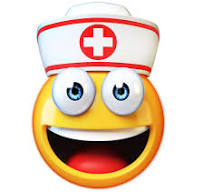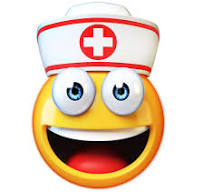

## Author: Ololade Folashade

## Date: June 2025

## ** Project Overview

### Diabetes prediction project focuses on leveraging machine learning algorithms to proactively and accurately predict diabetic patients for a healthcare clinic to improve patient outcomes and resource allocation.

## 1. Import Libraries

In [7]:
# Import essential libraries for data manipulation, visualization and machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. Load and Inspect Data

In [9]:
# Load patient dataset

patientdata_df = pd.read_csv("diabetes_prediction_dataset.csv")

In [10]:
# Display first 20 rows of data to understand data structure

patientdata_df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


## 3. Check for Missing Values

In [12]:
# Display column info and data types

patientdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [13]:
# Statistical summary of numerical columns

patientdata_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [14]:
# Check for missing values across all columns

patientdata_df.isnull().sum()
# No missing values found in dataset

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## 4. Initial Data Visualization

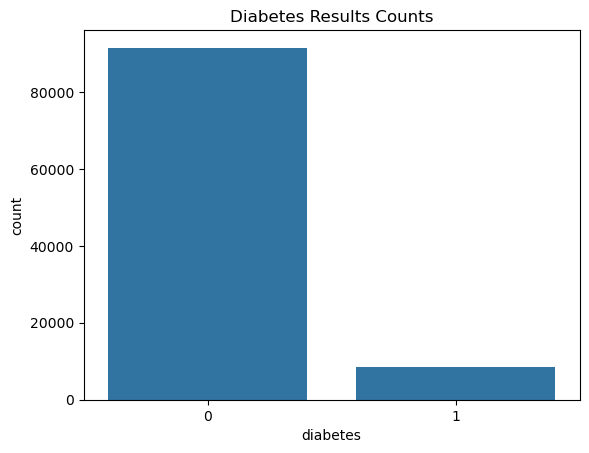

In [16]:
# Visualize diabetes outcome distribution (0=No, 1 = Yes)

sns.countplot(x='diabetes', data=patientdata_df)
plt.title('Diabetes Results Counts')
plt.show()

In [17]:
# Calculate baseline model performance if always predicitng majority class

diabetes_yes_prob = float((patientdata_df['diabetes'].value_counts()[1] / patientdata_df['diabetes'].value_counts()[0]))
diabetes_no_prob = 1 - diabetes_yes_prob

print(f'Accuracy of a model that always predicts yes is {diabetes_yes_prob * 100}')
print(f'Accuracy of a model that always predicts no is {diabetes_no_prob * 100}')

Accuracy of a model that always predicts yes is 9.289617486338798
Accuracy of a model that always predicts no is 90.7103825136612


Based on the high number of negatives, whatever models we build need to have a probability significantly greater than 91%

## 5. Univariate Analysis

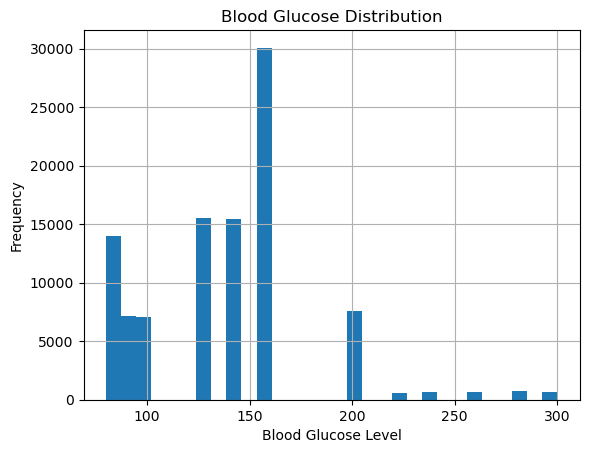

In [20]:
# Plot distribution of key individual features

# Blood Glucose Distribution
patientdata_df['blood_glucose_level'].hist(bins=30)
plt.title('Blood Glucose Distribution')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.show()


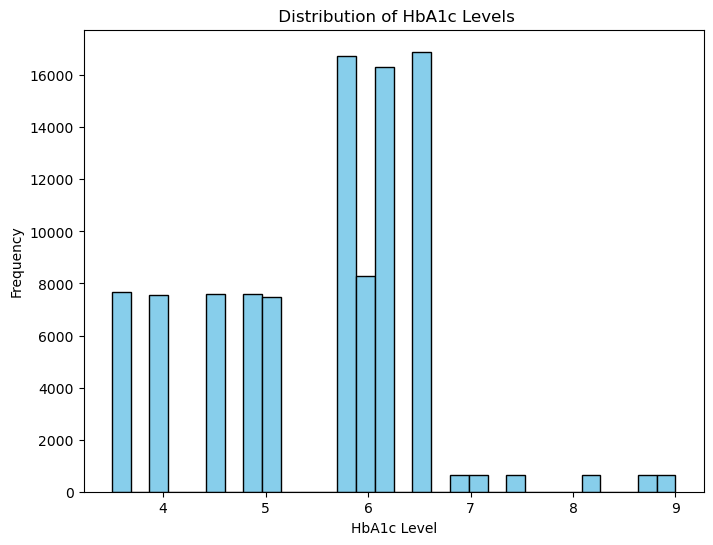

In [21]:
#HbA1c level

plt.figure(figsize=(8, 6))
plt.hist(patientdata_df['HbA1c_level'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.title(' Distribution of HbA1c Levels')
plt.show()

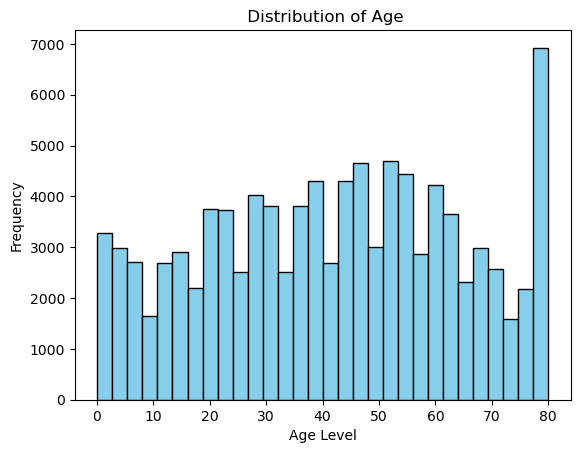

In [22]:
#Age distribution

plt.hist(patientdata_df['age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age Level')
plt.ylabel('Frequency')
plt.title(' Distribution of Age')
plt.show()


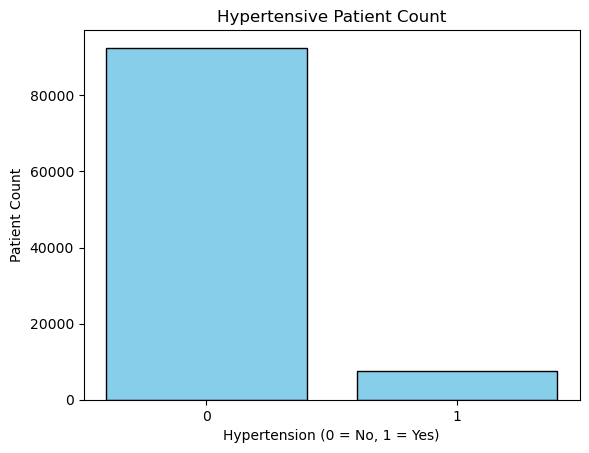

In [23]:
# Hypertensive patient count

hypertension_counts = patientdata_df['hypertension'].value_counts()
plt.bar(hypertension_counts.index, hypertension_counts.values, color='skyblue', edgecolor='black')
plt.title('Hypertensive Patient Count')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.xticks([0, 1])
plt.ylabel('Patient Count')
plt.show()

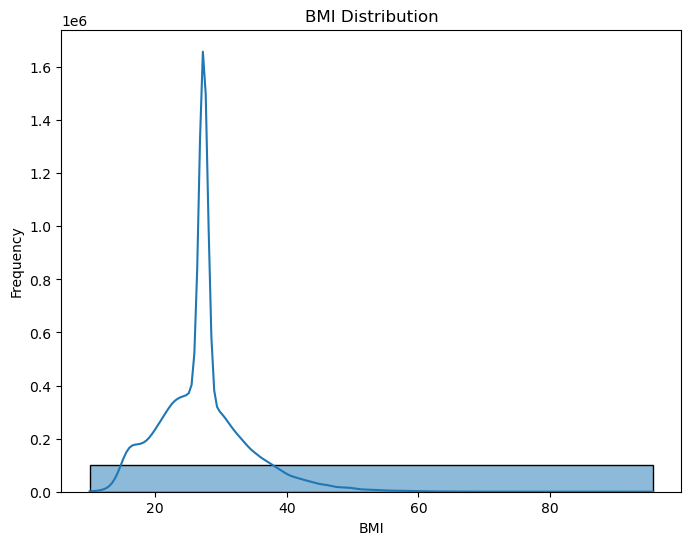

In [24]:
# BMI distribution with KDE
plt.figure(figsize=(8, 6))
sns.histplot(patientdata_df['bmi'], bins=1, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()
             

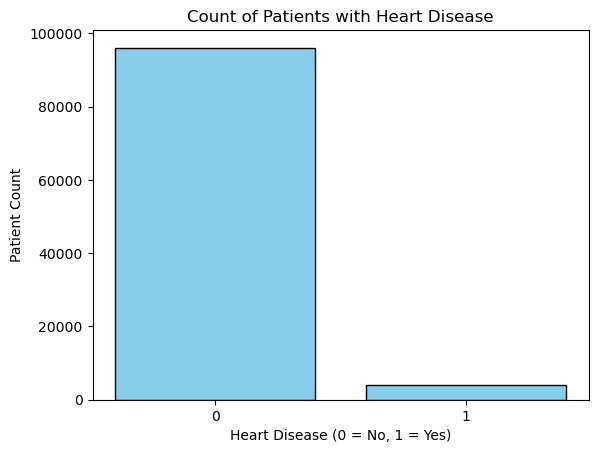

In [25]:
# Count of patients with heart disease

heartdisease_counts = patientdata_df['heart_disease'].value_counts()
plt.bar(heartdisease_counts.index, heartdisease_counts.values, color='skyblue', edgecolor='black')
plt.title('Count of Patients with Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.xticks([0, 1])
plt.ylabel('Patient Count')
plt.show()


## 7. Encoding Categorical Variables

In [27]:
# Convert categorical variables to dummy variables 

patientdata_df['gender'].value_counts()
patientdata_df = pd.get_dummies(patientdata_df, columns=['gender'], drop_first=True)
patientdata_df = pd.get_dummies(patientdata_df, columns=['smoking_history'], drop_first=True)

## 8. Correlation Matrix

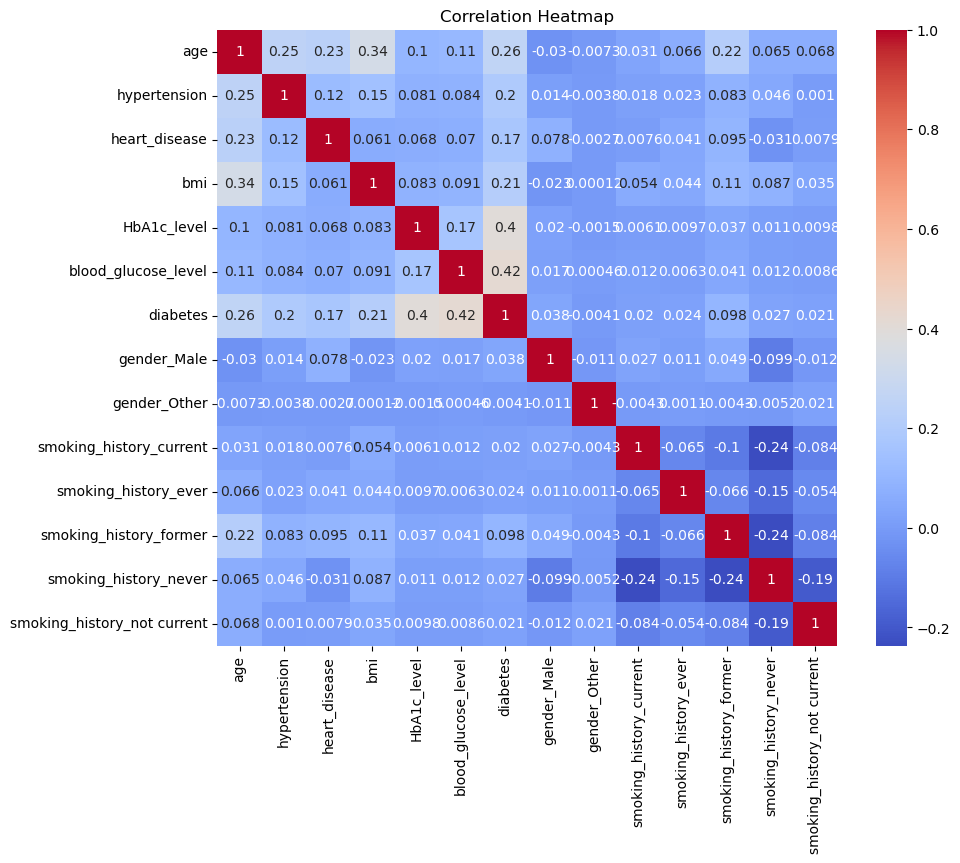

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(patientdata_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# blood_glucose_leve and HbA1c have the strongest relationship with diabetes - this will be good for model training
# age, hypertension and bmi have weak but positive relationship with diabetes - both variables will be uwseful as predictors
# gender and smoking history hav every little correlation, may not be very useful for model

## 9. Visualize Feature vs Target Variable

<function matplotlib.pyplot.show(close=None, block=None)>

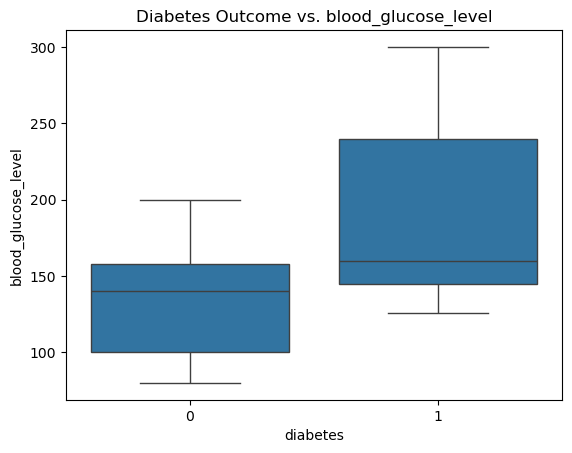

In [31]:
# Blood Glucose vs Diabetes

sns.boxplot(x='diabetes', y='blood_glucose_level', data= patientdata_df)
plt.title('Diabetes Outcome vs. blood_glucose_level')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

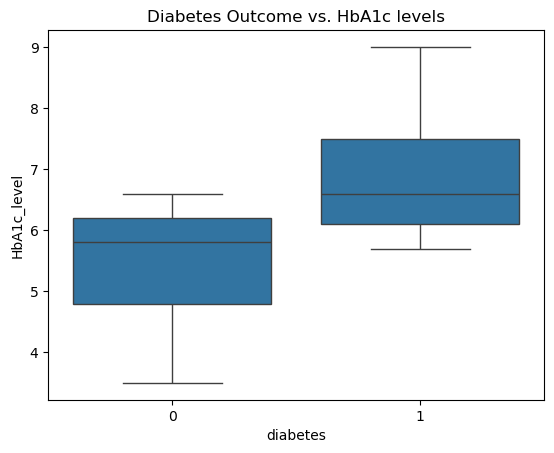

In [32]:
# Blood Glucose vs HbA1c Level
sns.boxplot(x='diabetes', y='HbA1c_level', data= patientdata_df)
plt.title('Diabetes Outcome vs. HbA1c levels')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

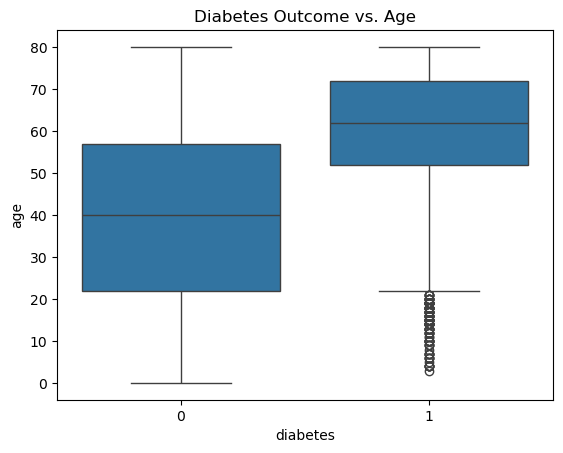

In [33]:
# Age vs Diabetes

sns.boxplot(x='diabetes', y='age', data= patientdata_df)
plt.title('Diabetes Outcome vs. Age')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

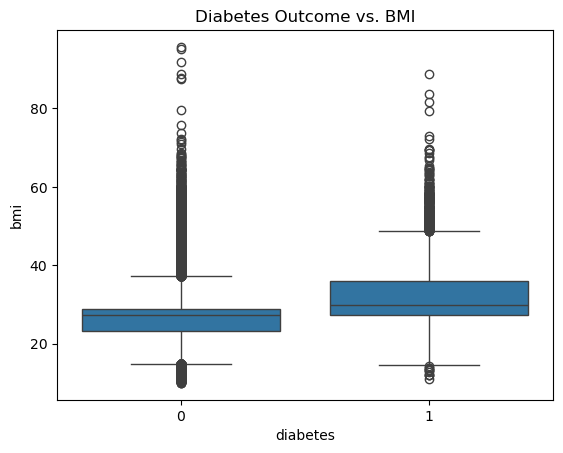

In [34]:
# Diabetes vs BMI

sns.boxplot(x='diabetes', y='bmi', data= patientdata_df)
plt.title('Diabetes Outcome vs. BMI')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

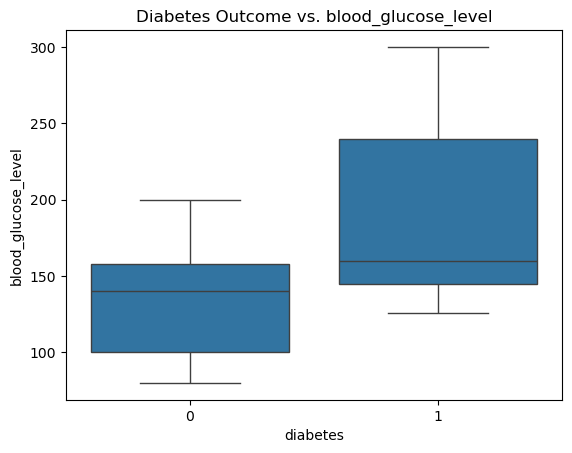

In [35]:
# Diabetes vs Blood Glucose Outcome

sns.boxplot(x='diabetes', y='blood_glucose_level', data= patientdata_df)
plt.title('Diabetes Outcome vs. blood_glucose_level')
plt.show

In [36]:
# Create a contingency table showing the percentage distribution of diabetes outcomes for hypertensive and non-hypertensive patients

contingency_table = pd.crosstab(patientdata_df['hypertension'], patientdata_df['diabetes'], normalize=True) * 100
print(contingency_table)

diabetes           0      1
hypertension               
0             86.103  6.412
1              5.397  2.088


<Axes: xlabel='hypertension'>

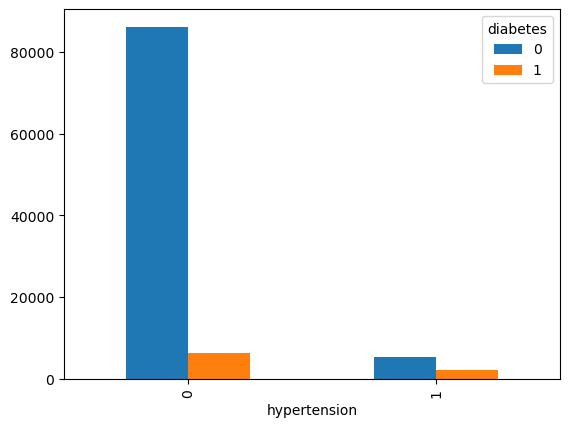

In [37]:
# This bar chart helps compare how hypertension status affects diabetes occurrence in raw counts.

pd.crosstab(patientdata_df['hypertension'], patientdata_df['diabetes']).plot(kind="bar",stacked=False)

In [38]:
# Create a contingency table showing the percentage distribution of diabetes outcomes based on heart disease presence

contingency_table = pd.crosstab(patientdata_df['heart_disease'], patientdata_df['diabetes'], normalize=True) * 100
print(contingency_table)


diabetes            0      1
heart_disease               
0              88.825  7.233
1               2.675  1.267


<Axes: xlabel='heart_disease'>

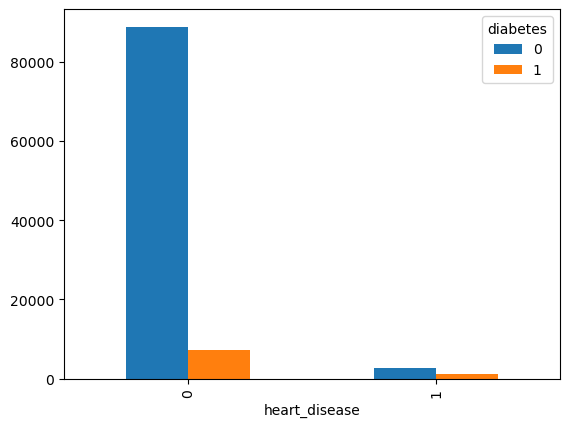

In [39]:
# Helps visually assess how heart disease correlates with diabetes using patient counts.

pd.crosstab(patientdata_df['heart_disease'], patientdata_df['diabetes']).plot(kind="bar",stacked=False)

## 10. Multivariate Analysis / Feature Importance

In [41]:
# Normalize features for linear model

scaler = StandardScaler()
df_normalized_minmax = pd.DataFrame(scaler.fit_transform(patientdata_df), columns=patientdata_df.columns)


In [42]:
# Build linear regression model to understand important variables and map that to correlation

X = df_normalized_minmax[['gender_Male', 'gender_Other', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
                    'smoking_history_current', 'smoking_history_never', 'smoking_history_ever', 'smoking_history_not current']]
y = df_normalized_minmax['diabetes'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:

X_sm = sm.add_constant(X)

lr_model = sm.OLS(y, X_sm)
lr_results = lr_model.fit()
print(lr_results.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     4455.
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:43:03   Log-Likelihood:            -1.0264e+05
No. Observations:              100000   AIC:                         2.053e+05
Df Residuals:                   99987   BIC:                         2.054e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Selected Variables

Correlation and a standard multilinear regression  tells us that the significant variables are:

- gender_Male
- age
- hypertension
- heart_disease
- bmi
- HbA1c_level
- blood_glucose_level
- smoking_history_never

Using a max p-value of 0.05, we will limit our models to these variables for better performance
We can also tell that age is highly correlated with hypertension, heart_disease, bmi so we need to ensure that we penalize models enough to cancel out the multicolinearity.

## 11. Model Training and Evaluation (Logistic, Decision Tree, Random Forest)

In [46]:
# Use only significant independent variables

X_train_p = X_train[['gender_Male', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level','smoking_history_never']]
X_test_p = X_test[['gender_Male', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level','smoking_history_never']]

## Logistic Regression

In [48]:
random_state = 795
lr_model = LogisticRegression(random_state=random_state)

lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_p, y_train)

print(f"Best parameters: {lr_grid_search.best_params_}")
print(f"Best cross-validation score: {lr_grid_search.best_score_}")

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.9607125


In [49]:
best_lr_model = lr_grid_search.best_estimator_
lr_y_pred = best_lr_model.predict(X_test_p)

print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))

Accuracy: 0.9591

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           3       0.88      0.60      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
 [[18152   140]
 [  678  1030]]


## Decision Tree Classifier

In [51]:
dt_model = DecisionTreeClassifier(random_state=random_state)

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_p, y_train)

print(f"Best parameters: {dt_grid_search.best_params_}")
print(f"Best cross-validation score: {dt_grid_search.best_score_}")

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best cross-validation score: 0.9718


In [52]:
best_dt_model = dt_grid_search.best_estimator_
dt_y_pred = best_dt_model.predict(X_test_p)

print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))

Accuracy: 0.97215

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           3       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[18292     0]
 [  557  1151]]


## Random Forest Classifier

In [54]:
rf_model = RandomForestClassifier(random_state=random_state)

rf_param_grid = {
    'n_estimators': [25, 50, 75],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_p, y_train)

print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation score: {rf_grid_search.best_score_}")

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 25}
Best cross-validation score: 0.9718875


In [55]:
best_rf_model = rf_grid_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test_p)

print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Accuracy: 0.9722

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           3       1.00      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[18291     1]
 [  555  1153]]


Based on the results of the three models built, The random forest is the most accurate model. While it is only slightly better than decision tree, they both are significantly better than the logistic regression model. And all models do better than the base model that always predicts a no.

## 12. Conclusion